<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__DL_M6_Case_Study_Classifying_Images_of_certain_clothing_and_accessory_using_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Classifying Images of certain clothing and accessory using Tensorflow

##Problem Statement

MNIST ("Modified National Institute of Standards and Technology") images of certain clothing and accessory Classification Dataset . In this notebook , goal is to correctly identify clothing and accessory from a dataset of thousands of clothing and accessory images.

![alt text](https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png)

####**Dataset Description**

- [MNIST Fashion Dataset ](https://github.com/zalandoresearch/fashion-mnist)
- Pixel-value 0 to 255
- Total Images: 70,000
- Train Images: 60,000
- Test Images: 10,000
- Image Size: 28 X 28
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'

####**Summary of  the Notebook**

- Install Tensorflow 2.x
- Import the required libraries - tensorflow
- Read the dataset - Understanding - Preprocessing
- Split the dataset to training and testing[Already Done]
- Create a Model
- Check accuracy - validation
-  Tune Parameters
- Accuracy - validation

# Model Classifying clothing and accessory using Tensorflow

##Installing TensorFlow

In [50]:
! pip install tensorflow # install tensorflow library

In [51]:
# verify installation
import tensorflow as tf  #importing tensorflow
from tensorflow import keras #fatser imlementation tensorflow

#check tf.keras version
print(tf.__version__)

2.15.0


## Import the required libraries - tensorflow

In [52]:
#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

##Preparing the Data

###Loading the Data

In [53]:
mnist = keras.datasets.fashion_mnist #loading the dataset
(X_train,Y_train),(X_test,Y_test) = mnist.load_data() #training and testing dataset
## X_train - x_data - images
## Y_data -> number of classes

In [54]:
X_train[0]
#Y_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

- It will  require to flatten the array means 28x28 dimensional array to one single list of 784 index  (28x28).  Reason behind this Single layer perceptron and Multi Layer Perceptron can handle only 2 dimension data.

In [55]:
#X_train[0].shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [56]:
#floating into decimals.Weight  can be decimal .
X_train = X_train.astype('float32')
X_test=X_test.astype('float32')

In [57]:
# reshaping in 2- D array
reshaped =784
X_train = X_train.reshape(60000,reshaped)
X_test = X_test.reshape(10000,reshaped)

# converting in float32 to use 32- bit precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)

#normalizing the input values
X_train /= 255
X_test /= 255

print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


(60000, 784)
60000 train samples
10000 test samples


### One-Hot Encoding
- Best for multi-class classification

In [58]:
# One-hot representation of the labels
Y_train=keras.utils.to_categorical(Y_train,10) # 10 represent number of unique class
Y_test=keras.utils.to_categorical(Y_test,10)
print(Y_train.shape)
Y_train[0]

(60000, 10)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Designing the Model

### Preparing the Model 0 : Single Layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # fully connected
from tensorflow.keras import Sequential #sequential model - sequence of layers one after another

#A(X.W+b) = yp
# A - Activation function
# W - weight
# b - bias
#yactual [none,10]
#(None,784)*() = (None,10)  [y]
# none stands for batch size -- no of training example
# X -- (60000,784)
# y -- (60000,10)
# X.W = y
# (60000,784)*()=(60000,10)
# to get this it will require (784,10) this is input_shape passed (784,)

model_0 = Sequential() #creating a model
model_0.add(Dense(10,input_shape=(784,),name ='dense_layer',activation='softmax')) #adding a dense
# 10  -- no of output classes
# 784 -- no of nodes inputs
# softmax -- output type is multi class classification

In [60]:
# compling  the model
# loss to find the error difference between actual and predicted
# sgd -- Stochastic Gradient Descent
model_0.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
training = model_0.fit(X_train,Y_train,
                       batch_size=100, #480 images at a time = 48000
                       epochs = 5,
                       validation_split=0.2) #20% data for validation

Epoch 1/5
480/480 [==============================] - 2s 4ms/step - loss: 1.1429 - accuracy: 0.6589 - val_loss: 0.8347 - val_accuracy: 0.7317
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.7738 - accuracy: 0.7547 - val_loss: 0.7137 - val_accuracy: 0.7674
Epoch 3/5
480/480 [==============================] - 3s 7ms/step - loss: 0.6900 - accuracy: 0.7804 - val_loss: 0.6585 - val_accuracy: 0.7860
Epoch 4/5
480/480 [==============================] - 2s 5ms/step - loss: 0.6441 - accuracy: 0.7937 - val_loss: 0.6231 - val_accuracy: 0.7962
Epoch 5/5
480/480 [==============================] - 3s 5ms/step - loss: 0.6137 - accuracy: 0.8036 - val_loss: 0.5995 - val_accuracy: 0.8007


In [62]:
def plot_graph(training):
  import matplotlib.pyplot as plt
  # list all data in training
  print(training.history.keys())
  # summarize training for accuracy
  plt.plot(training.history['accuracy'])
  plt.plot(training.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize traning for loss
  plt.plot(training.history['loss'])
  plt.plot(training.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


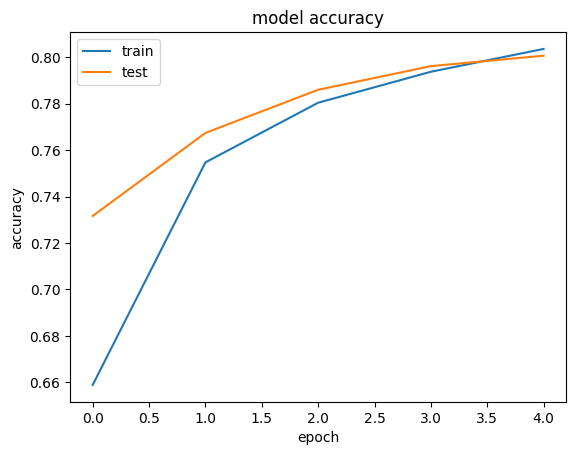

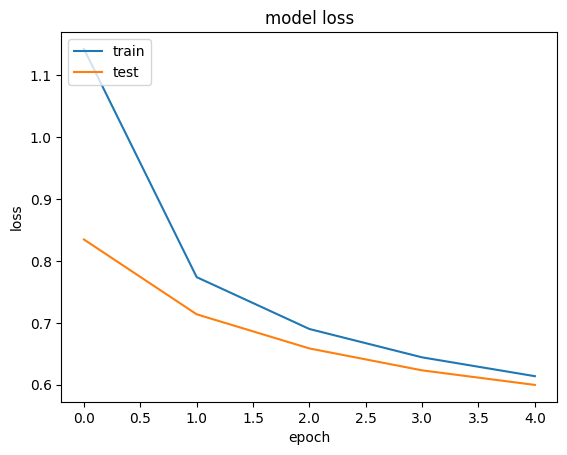

In [63]:
 plot_graph(training)

In [64]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6242 - accuracy: 0.7938
Test accuracy: 0.7937999963760376


In [65]:
model_0.get_config()

{'name': 'sequential_4',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'bu

###Improved Model : Adding Hidden Layer - Multi Layer Perceptron

In [66]:
model_1 = Sequential() #intialize the class

N_hidden = 32 # number of nodes in hidden layer , it can any number depends on how much accuracy are we getting

#adding a hidden dense layer
# activation = 'sigmoid' -- best for multi-layer NN
model_1.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation ='sigmoid')) #[None,784]*[784,32] = [None,32] -- output

#adding another a hidden dense layer
# activation = 'sigmoid' -- best for multi-layer NN
#[None,784] -- input layer
#[None,784]*[784,32] = [None,32] -- first hidden layer
 #[None,32]*[32,16] = [None,16] -- second  hiidden layer
model_1.add(Dense(16,name='dense_layer_2',activation='sigmoid'))

#final output layer
# activation = 'softmax' -- output layer is multi-class
#[None,784] -- input layer
#[None,784]*[784,32] = [None,32] -- first hidden layer
 #[None,32]*[32,16] = [None,16] -- second  hiidden layer
 #[None,16]*[16,10] = [None,10] -- output layer
model_1.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [67]:
# compling the model
model_1.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
#training the model.
model_1.fit(X_train,Y_train,
            batch_size=50, #960 images at a time = 48000
            epochs=20,
            validation_split=0.2) #20% data for validation

Epoch 1/20
960/960 [==============================] - 8s 7ms/step - loss: 2.2566 - accuracy: 0.2688 - val_loss: 2.1841 - val_accuracy: 0.4460
Epoch 2/20
960/960 [==============================] - 5s 5ms/step - loss: 2.0851 - accuracy: 0.4981 - val_loss: 1.9558 - val_accuracy: 0.4535
Epoch 3/20
960/960 [==============================] - 4s 4ms/step - loss: 1.8051 - accuracy: 0.4844 - val_loss: 1.6557 - val_accuracy: 0.5107
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 1.5406 - accuracy: 0.5245 - val_loss: 1.4329 - val_accuracy: 0.5529
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 1.3585 - accuracy: 0.5704 - val_loss: 1.2848 - val_accuracy: 0.5978
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 1.2362 - accuracy: 0.6055 - val_loss: 1.1827 - val_accuracy: 0.6217
Epoch 7/20
960/960 [==============================] - 4s 4ms/step - loss: 1.1485 - accuracy: 0.6309 - val_loss: 1.1061 - val_accuracy: 0.6431
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


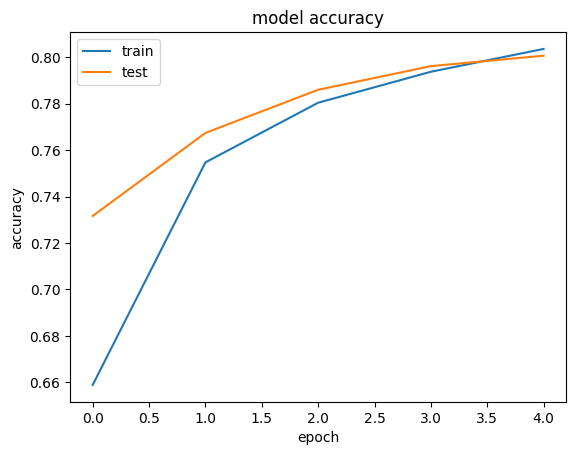

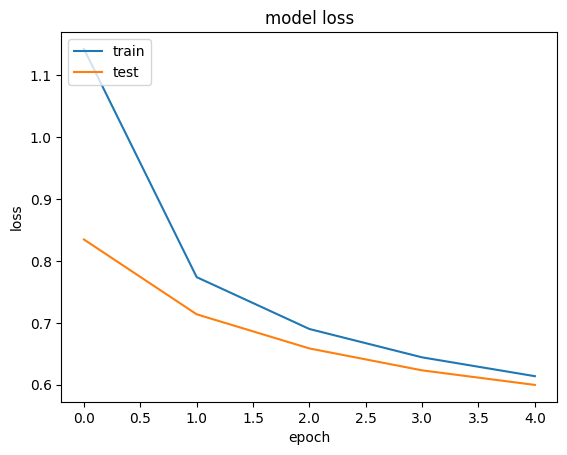

In [69]:
 plot_graph(training)

In [70]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.7519
Test accuracy: 0.7519000172615051


In [71]:
model_1.get_config()

{'name': 'sequential_5',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 32,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'bu